Car price Prediction

Costs of car usage, which may include the cost of: acquiring the vehicle, repairs and auto maintenance, fuel, depreciation, driving time, parking fees, taxes, and insurance,are weighed against the cost of the alternatives, and the value of the benefits – perceived and real – of vehicle usage. The benefits may include on-demand transportation, mobility, independence and convenience. During the 1920s, cars had another benefit: "couples finally had a way to head off on unchaperoned dates, plus they had a private space to snuggle up close at the end of the night."

Similarly the costs to society of car use may include; maintaining roads, land use, air pollution, road congestion, public health, health care, and of disposing of the vehicle at the end of its life; and can be balanced against the value of the benefits to society that car use generates. Societal benefits may include: economy benefits, such as job and wealth creation, of car production and maintenance, transportation provision, society wellbeing derived from leisure and travel opportunities, and revenue generation from the tax opportunities. The ability of humans to move flexibly from place to place has far-reaching implications for the nature of societies

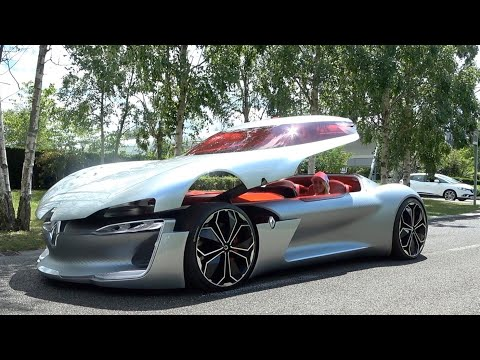

In [ ]:

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt



import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [ ]:
df = pd.read_csv("/kaggle/input/car-price-prediction/CarPrice_Assignment.csv")
df1 = pd.read_excel("/kaggle/input/car-price-prediction/Data Dictionary - carprices.xlsx")

In [ ]:
df

In [ ]:
df['fuelsystem'].value_counts()

In [ ]:
df.info()

In [ ]:
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
df['fueltype'] = labelencoder.fit_transform(df['fueltype'])
df['aspiration'] = labelencoder.fit_transform(df['aspiration'])
df['carbody'] = labelencoder.fit_transform(df['carbody'])
df['drivewheel'] = labelencoder.fit_transform(df['drivewheel'])
df['enginelocation'] = labelencoder.fit_transform(df['enginelocation'])
df['fuelsystem'] = labelencoder.fit_transform(df['enginelocation'])

In [ ]:
df['doornumber'] = df['doornumber'].map({'two':2,'four':4})

In [ ]:
df

In [ ]:
corrmat = df.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))
g=sns.heatmap(df[top_corr_features].corr(),annot=True,cmap="RdYlGn")

In [ ]:
data = df[['horsepower','boreratio','enginesize','curbweight','carwidth','carlength','wheelbase','drivewheel','price','enginelocation']]

In [ ]:
data

In [ ]:
x = (data.loc[:, data.columns != 'price'])
y = (data.loc[:, data.columns == 'price'])
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=42)


In [ ]:
from sklearn.linear_model import  LinearRegression

# creating a model
model = LinearRegression()

# feeding the training data to the model
model.fit(x_train, y_train)

# predicting the test set results
y_pred = model.predict(x_test)

# calculating the classification accuracies
print("Training Accuracy :", model.score(x_train, y_train))
print("Testing Accuracy :", model.score(x_test, y_test))